# SVM.  Опорные объекты

###### Введение
Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Метод опорных векторов имеет еще одну особенность. Если преобразовать его оптимизационную задачу, то окажется, что итоговый классификатор можно представить как взвешенную сумму скалярных произведений данного объекта на объекты обучающей выборки:
https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/0QyGrriIEeWfQgrIyj-wEQ_c0c52535894b1bbdcb49917053062ae4_svmpic.png?expiry=1616544000000&hmac=thZAcnBzRiSImXJEAOcLNvi1DFn-Y_hNtUP93yhJV_c 

По сути, алгоритм делает предсказания на основе сходства нового объекта с объектами обучающей выборки. При этом, как правило, далеко не все коэффициенты оказываются ненулевыми. Это означает, что классификация делается на основе сходства лишь с частью обучающих объектов. Такие объекты называются опорными.

Метод опорных векторов реализован в классе sklearn.svm.SVC.

Основными параметрами этого класса являются коэффициент С (коэф. регуляризации) и тип ядра kernel (функция скалярного произведения). В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра kernel='linear'
Индексы опорных объектов обученного классификатора хранятся в поле support_

In [79]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('svm-data.csv', index_col=False, header=None)

In [3]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.

In [4]:
from sklearn.svm import SVC

In [5]:
clf = SVC(C = 100000, kernel='linear', random_state=241)

In [6]:
clf.fit(X,y)

SVC(C=100000, kernel='linear', random_state=241)

Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [7]:
print(*clf.support_ + 1)

4 5 10


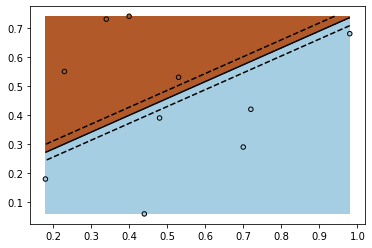

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.clf()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)

#     # Circle out the test data
#     plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
#                 zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X.iloc[:, 0].min()
x_max = X.iloc[:, 0].max()
y_min = X.iloc[:, 1].min()
y_max = X.iloc[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.show()

# Анализ текстов

###### Введение
Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Одна из причин популярности линейных методов заключается в том, что они хорошо работают на разреженных данных. Так называются выборки с большим количеством признаков, где на каждом объекте большинство признаков равны нулю. Разреженные данные возникают, например, при работе с текстами. Дело в том, что текст удобно кодировать с помощью "мешка слов" — формируется столько признаков, сколько всего уникальных слов встречается в текстах, и значение каждого признака равно числу вхождений в документ соответствующего слова. Ясно, что общее число различных слов в наборе текстов может достигать десятков тысяч, и при этом лишь небольшая их часть будет встречаться в одном конкретном тексте.

Можно кодировать тексты хитрее, и записывать не количество вхождений слова в текст, а TF-IDF. Это показатель, который равен произведению двух чисел: TF (term frequency) и IDF (inverse document frequency). Первая равна отношению числа вхождений слова в документ к общей длине документа. Вторая величина зависит от того, в скольки документах выборки встречается это слово. Чем больше таких документов, тем меньше IDF. Таким образом, TF-IDF будет иметь высокое значение для тех слов, которые много раз встречаются в данном документе, и редко встречаются в остальных.

###### Данные
Как мы уже говорили выше, линейные методы часто применяются для решения различных задач анализа текстов. В этом задании мы применим метод опорных векторов для определения того, к какой из тематик относится новость: атеизм или космос.

Для начала вам потребуется загрузить данные. В этом задании мы воспользуемся одним из датасетов, доступных в scikit-learn'е — 20 newsgroups. Для этого нужно воспользоваться модулем datasets:

In [26]:
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [55]:
#X = pd.DataFrame(newsgroups.data)
y = newsgroups.target

Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить TF-IDF по всем данным. При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной из теста. На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.

Одна из сложностей работы с текстовыми данными состоит в том, что для них нужно построить числовое представление. Одним из способов нахождения такого представления является вычисление TF-IDF. В Scikit-Learn это реализовано в классе sklearn.feature_extraction.text.TfidfVectorizer. Преобразование обучающей выборки нужно делать с помощью функции fit_transform, тестовой — с помощью transform.

Реализация SVM-классификатора находится в классе sklearn.svm.SVC. Веса каждого признака у обученного классификатора хранятся в поле coef_. Чтобы понять, какому слову соответствует i-й признак, можно воспользоваться методом get_feature_names() у TfidfVectorizer:

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(newsgroups.data)

In [51]:
feature_mapping = vectorizer.get_feature_names()
print(feature_mapping[:15]) #первые 15 закодированных слов

['00', '000', '0000', '00000', '000000', '000021', '000050', '000062david42', '000406', '000410', '00041032', '0004136', '00041555', '0004244402', '0004246']


Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).

Подбор параметров удобно делать с помощью класса sklearn.grid_search.GridSearchCV (При использовании библиотеки scikit-learn версии 18.0.1 sklearn.model_selection.GridSearchCV).

Первым аргументом в GridSearchCV передается классификатор, для которого будут подбираться значения параметров, вторым — словарь (dict), задающий сетку параметров для перебора.

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [59]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
#cv = KFold(y.size, n_folds=5, shuffle=True, random_state=241) # old version
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X_vec, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=SVC(kernel='linear', random_state=241),
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             scoring='accuracy')

In [65]:
print(gs.best_score_)
print(gs.best_params_)

0.9932804406678872
{'C': 1.0}


Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.

In [73]:
clf_opt = SVC(kernel='linear', random_state=241, C=1.0)

In [74]:
clf_opt.fit(X_vec, y)

SVC(kernel='linear', random_state=241)

Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле coef_ у svm.SVC). Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, в лексикографическом порядке.

In [124]:
w = np.argsort(np.abs(np.asarray(clf_opt.coef_.todense())).reshape(-1))[-10:]
# clf_opt.coef_.todense() - weights
# np.abs - по модулю
# np.argsort - сортировка по убыванию
# [-10:] - первые 10 элементов

In [129]:
word = vectorizer.get_feature_names()
print(*np.sort([word[i] for i in w]))

atheism atheists bible god keith moon religion sci sky space
